# Regression - GLMs (Generalized Linear Models)

## Exotic Distributions

The distribution of the target variable is of paramount importance when modelling.

When you come across data with a target distribution very far from a Normal Distribution, there are a few strategies available:

- If you are only interested in **prediction**, you can use **nonlinear models** (eg. machine learning) which doesn't care about distributions.

If you need to maintain interpretability, you have a few choices:

- Try to modify the target to be closer to Normal
- Use a model which assumes a non-normal distribution.

[Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution) (distribution of binary outcomes).

We won't have time to dive deeply into each exotic distribution model -- each one has complexity and nuance in interpretation and testing. We just want to quickly surveil what's out there. 

Here are a few.

### 1. Poisson Distribution

The Poisson distribution models counts of things. This could be:

- The number of children people have
- The number of letters you got in the mail today
- etc.

Since these events are distributed in a non-normal fashion, the Poisson distribution is built to model them. Unlike the normal distribution, which is parametrized by two numbers (the **mean** and the **variance** of the bell curve) the Poisson is only parametrized by a single number, the lambda:

<img src="../assets/poisson.png" style="background:#fff;max-width:600px" />

We can do Poisson Regression from statsmodels:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
sns.set()

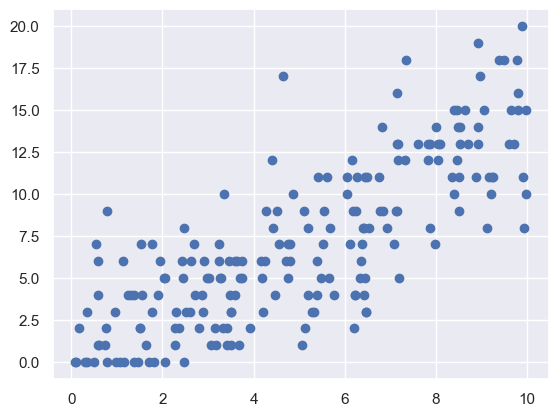

<AxesSubplot:>

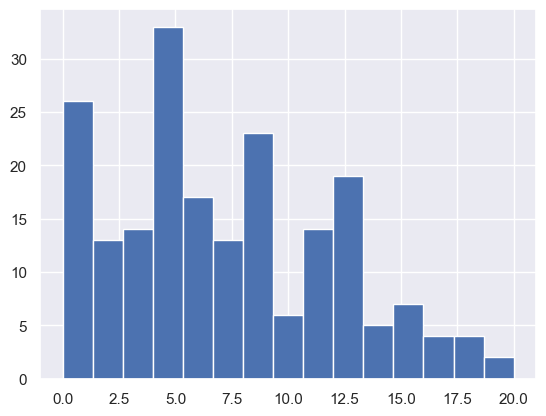

In [2]:
# poisson

## Artifical Data ##
rng = np.random.RandomState(1)

x = 10 * np.random.rand(200)
y = np.floor(1.5 * x + (3 * np.random.randn(200)))

# clip y to non-negative values
y[y < 0] = 0.
plt.scatter(x, y)
plt.show()
pd.Series(y).hist(bins=15)

In [3]:
#Poisson Regression

X = sm.add_constant(x)

poisson_est = sm.Poisson(y,X).fit()
poisson_est.summary()

Optimization terminated successfully.
         Current function value: 2.505489
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                        Poisson   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Dec 2022   Pseudo R-squ.:                  0.2977
Time:                        10:34:01   Log-Likelihood:                -501.10
converged:                       True   LL-Null:                       -713.47
Covariance Type:            nonrobust   LLR p-value:                 2.263e-94
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8087      0.071     11.417      0.000       0.670       0.948
x1             0.1995      0.010     19.825      0.000       0.180       0.219
==============================================================================
"""

Few notes:

1. Poisson assumes the variance is equal to the mean ($\lambda$ parameter). This is rarely the case
2. If $\lambda \ge 20$ then the Poisson distribution is roughly equal to the Normal distribution so you might as well use OLS.

So Poisson is only useful for very specific cases: Distributions of non-negative counts with low mean and variance equal to the mean.

### 2. Negative Binomial

The [Negative Binomial distribution](https://en.wikipedia.org/wiki/Negative_binomial_distribution) is a generalization of the Poisson distribution which allows for a variance value free from the mean value:

![](../assets/negbinomial.gif)

This means the distribution fits an additional **alpha** parameter to the model.

In [4]:
# negative binomial 
X = sm.add_constant(x)

neg_bino_est = sm.NegativeBinomial(y,X).fit()
neg_bino_est.summary()

#See alpha param in summary

Optimization terminated successfully.
         Current function value: 2.494349
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:               NegativeBinomial   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Dec 2022   Pseudo R-squ.:                  0.1519
Time:                        10:34:01   Log-Likelihood:                -498.87
converged:                       True   LL-Null:                       -588.24
Covariance Type:            nonrobust   LLR p-value:                 9.123e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7947      0.078     10.214      0.000       0.642       0.947
x1             0.2019      0.011     17.557      0.000       0.179       0.224
alpha          0.0367      0.021      1.744      0.081      -0.005       0.078
==============================================================================
"""

### 3. Zero Inflated Models

Some distributions have a large spike at zero which most distributions can't fit to.

This can be fit to using [Zero Inflated Models](https://en.wikipedia.org/wiki/Zero-inflated_model) which basically fit two distributions at the same time (one binary for the probability of being zero, and one for the rest of the distribution)

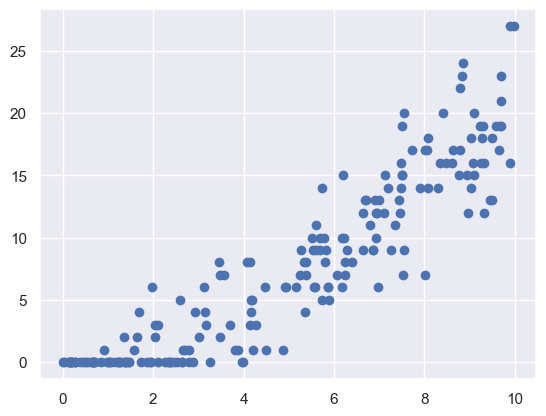

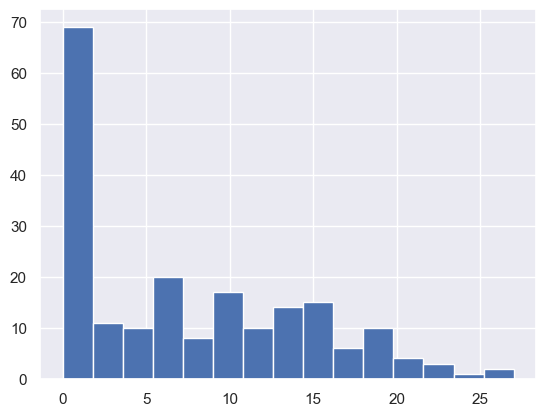

In [5]:
# zero inflated model

## Artifical Data ##
x = 10 * rng.rand(200)
y = np.floor(2.5 * x - 5.5 + (3 * np.random.randn(200)))
# clip y to non-negative values
y[y < 0] = 0.
plt.scatter(x, y)
plt.show()
pd.Series(y).hist(bins=15);

In [6]:
#
X = sm.add_constant(x)

est = sm.ZeroInflatedPoisson(y,X).fit()
est.summary()

# One problem with ZI models are that they're very finicky and brittle (at least in the statsmodels implementation).
# I rarely end up using ZI models in practice for this reason and instead my personal solution is to decompose the idea of a ZI model by hand:

Optimization terminated successfully.
         Current function value: 2.248234
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18


C:\Users\Simona\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                       y   No. Observations:                  200
Model:             ZeroInflatedPoisson   Df Residuals:                      198
Method:                            MLE   Df Model:                            1
Date:                 Sun, 18 Dec 2022   Pseudo R-squ.:                  0.3371
Time:                         10:34:02   Log-Likelihood:                -449.65
converged:                        True   LL-Null:                       -678.34
Covariance Type:             nonrobust   LLR p-value:                1.785e-101
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const    -1.7410      0.292     -5.972      0.000      -2.312      -1.170
const             0.1250      0.108      1.155      0.248      -0.087       0.337
x1                0.3107      0.014     22.758      0.000       0.284       0.337
=================================================================================
"""



### 4. Two Stage modelling

A manual solution to ZI problems is a **two stage** approach:

1. Fit a logit regression to predict if $y = 0$
2. Use the output of this model as a feature input into the another model which predicts on a distribution that fits the nonzero values.

This has to be implemented by hand, however. 

**N.B.** Don't confuse this with [two stage least squares](https://en.wikipedia.org/wiki/Instrumental_variables_estimation) which is a different thing. We might see that one at the end of the course when we tackle causality.


In [7]:
# Stage 1 logistic regression to predict if 0 or not and will use predicted values to feed to second stage

est1 = sm.Logit(
    (y > 0).astype(int),
    sm.add_constant(x)
).fit()

est1.summary()

Optimization terminated successfully.
         Current function value: 0.192703
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Dec 2022   Pseudo R-squ.:                  0.6823
Time:                        10:34:02   Log-Likelihood:                -38.541
converged:                       True   LL-Null:                       -121.31
Covariance Type:            nonrobust   LLR p-value:                 6.951e-38
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9636      0.704     -5.627      0.000      -5.344      -2.583
x1             1.5710      0.267      5.888      0.000       1.048       2.094
==============================================================================

Possibly complete quasi-separation: A fraction 0.17 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     645.2
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           3.33e-87
Time:                        10:34:02   Log-Likelihood:                -472.91
No. Observations:                 200   AIC:                             951.8
Df Residuals:                     197   BIC:                             961.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7532      0.383     -4.583      0.000      -2.508      -0.999
x              2.8890      0.131     21.988      0.000       2.630       3.148
stage1        -6.8492      1.041     -6.579      0.000      -8.902      -4.796
==============================================================================
Omnibus:                        5.119   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                5.441
Skew:                           0.236   Prob(JB):                       0.0658
Kurtosis:                       3.656   Cond. No.                         33.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

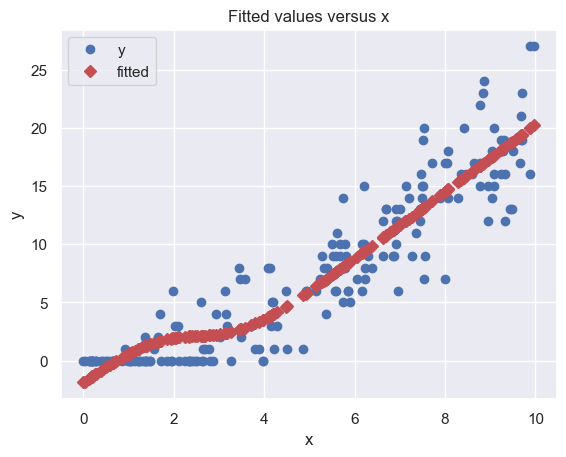

In [8]:
# Prep Stage 2 - Stage 2 can use Poisson etc. Not limited to OLS

X = pd.DataFrame(sm.add_constant(x))
X['stage1'] = est1.predict(X)
X.columns = ['const', 'x', 'stage1']

# Stage 2
est2 = sm.OLS(y, X).fit()
sm.graphics.plot_fit(est2, 1, vlines=False)
est2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1028.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           2.59e-80
Time:                        10:34:02   Log-Likelihood:                -492.77
No. Observations:                 200   AIC:                             989.5
Df Residuals:                     198   BIC:                             996.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8499      0.379     -7.514      0.000      -3.598      -2.102
x              2.1201      0.066     32.057      0.000       1.990       2.250
==============================================================================
Omnibus:                        3.642   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.162   Jarque-Bera (JB):                3.446
Skew:                           0.207   Prob(JB):                        0.178
Kurtosis:                       3.492   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

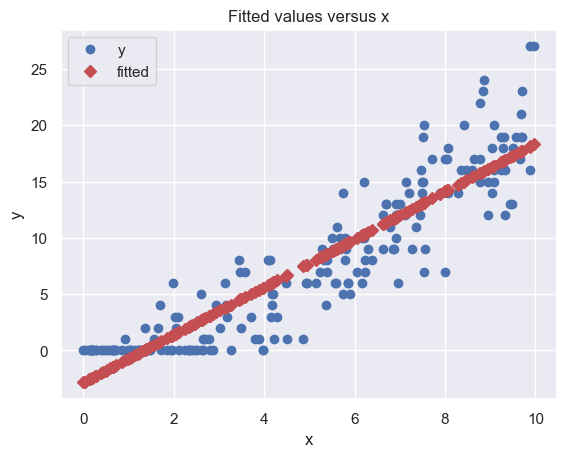

In [9]:
# The slope would be biased downward in an OLS model without the two-stage approach:
est_lin = sm.OLS(y, X[['const', 'x']]).fit()
sm.graphics.plot_fit(est_lin, 1, vlines=False)
est_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     438.2
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           1.28e-86
Time:                        10:34:02   Log-Likelihood:                -470.85
No. Observations:                 200   AIC:                             949.7
Df Residuals:                     196   BIC:                             962.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0402      0.519     -2.005      0.046      -2.063      -0.017
x              2.7649      0.144     19.178      0.000       2.481       3.049
stage1       -12.1985      2.846     -4.286      0.000     -17.812      -6.585
stage1_sq      5.6691      2.811      2.017      0.045       0.126      11.212
==============================================================================
Omnibus:                        7.800   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                9.762
Skew:                           0.285   Prob(JB):                      0.00759
Kurtosis:                       3.920   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

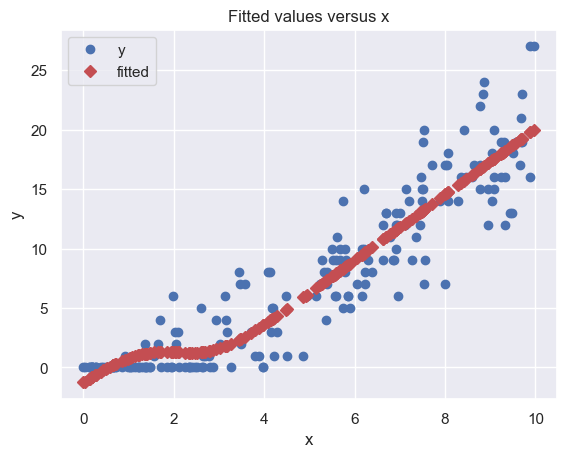

In [10]:
# The multi-stage model idea can be played around with to your heart's content:
X['stage1_sq'] = X.stage1 ** 2

est3 = sm.OLS(y, X).fit()
sm.graphics.plot_fit(est3, 1, vlines=False)
est3.summary()